In [2]:
# load correlation matrices
import numpy as np
import matplotlib.pyplot as plt

trt1_ses1 = np.load('/home/or/kpe_conn/trauma_ses_1.npy')
trt1_ses2 = np.load('/home/or/kpe_conn/trauma_ses_2.npy')

In [3]:
print (f'Shape of 1 {trt1_ses1.shape}')
print (f'Shape of 2 {trt1_ses2.shape}')

Shape of 1 (21, 268, 268)
Shape of 2 (21, 268, 268)


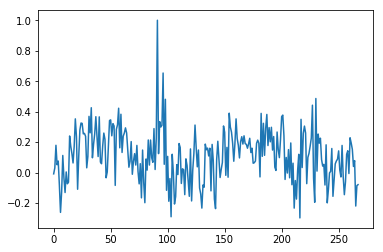

In [4]:
plt.plot(trt1_ses1[0][:,91])

In [4]:
# load clinical data
import pandas as pd
allDat = pd.read_csv('/home/or/Documents/kpe_analyses/KPEIHR0009_DATA_2019-10-07_1121.csv')

In [ ]:
allDat.head()

In [5]:
pclDat = allDat.filter(like='pcl5')
# remove two irrelevant vars
del pclDat['pcl5_complete']
del pclDat['pcl5_total']
# sum all pcl scores
a = pclDat.sum(axis = 1, skipna = True) 
# add a to df
pclDat.insert(20, "pcl_total", a)
pclDat.insert(0, "scr_id", allDat['scr_id'])
pclDat.insert(1, "redcap_event_name", allDat["redcap_event_name"])
pclDat.head()


,scr_id,redcap_event_name,pcl5_1,pcl5_2,pcl5_3,pcl5_4,pcl5_5,pcl5_6,pcl5_7,pcl5_8,...,pcl5_12,pcl5_13,pcl5_14,pcl5_15,pcl5_16,pcl5_17,pcl5_18,pcl5_19,pcl5_20,pcl_total
0,CB1554,screening_clinicia_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,CB1554,screening_raadmini_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,CB1554,screening_selfrepo_arm_1,3.0,3.0,2.0,2.0,1.0,1.0,4.0,2.0,...,3.0,3.0,2.0,2.0,0.0,1.0,4.0,2.0,4.0,51.0
3,CB1562,screening_clinicia_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CB1562,screening_raadmini_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
# subset to only relevant redcap event names
pclDat.redcap_event_name[0:30]

0     screening_clinicia_arm_1
1     screening_raadmini_arm_1
2     screening_selfrepo_arm_1
3     screening_clinicia_arm_1
4     screening_raadmini_arm_1
5     screening_selfrepo_arm_1
6     screening_raadmini_arm_1
7     screening_selfrepo_arm_1
8     screening_clinicia_arm_1
9     screening_raadmini_arm_1
10    screening_selfrepo_arm_1
11               visit_1_arm_1
12    visit_2_infusion_s_arm_1
13    visit_7_week_follo_arm_1
14    30_day_follow_up_s_arm_1
15    90_day_follow_up_s_arm_1
16    screening_clinicia_arm_1
17    screening_raadmini_arm_1
18    screening_selfrepo_arm_1
19    screening_clinicia_arm_1
20    screening_raadmini_arm_1
21    screening_selfrepo_arm_1
22               visit_1_arm_1
23    visit_2_infusion_s_arm_1
24    visit_7_week_follo_arm_1
25    30_day_follow_up_s_arm_1
26    90_day_follow_up_s_arm_1
27    screening_clinicia_arm_1
28    screening_raadmini_arm_1
29    screening_clinicia_arm_1
Name: redcap_event_name, dtype: object

In [7]:
newPclDat = pclDat[((pclDat['redcap_event_name'] == 'screening_selfrepo_arm_1') | (pclDat['redcap_event_name'] == 'visit_1_arm_1') | (pclDat['redcap_event_name'] == 'visit_2_infusion_s_arm_1') | (pclDat['redcap_event_name'] == 'visit_7_week_follo_arm_1') | (pclDat['redcap_event_name'] == '30_day_follow_up_s_arm_1') | (pclDat['redcap_event_name'] == '90_day_follow_up_s_arm_1'))]
#a = pclDat.query(redcap_event_name = 'screening_selfrepo_arm_1', 'visit_1_arm_1', 'visit_2_infusion_s_arm_1', 'visit_7_week_follo_arm_1', '30_day_follow_up_s_arm_1', '90_day_follow_up_s_arm_1')

In [ ]:
newPclDat

In [8]:
# now we need to move it from long to wide
widePclDat = newPclDat.pivot(index='scr_id', columns='redcap_event_name', values='pcl_total')
widePclDat

redcap_event_name,30_day_follow_up_s_arm_1,90_day_follow_up_s_arm_1,screening_selfrepo_arm_1,visit_1_arm_1,visit_2_infusion_s_arm_1,visit_7_week_follo_arm_1
scr_id,,,,,,
CB1554,NaN,NaN,51.0,NaN,NaN,NaN
CB1562,NaN,NaN,22.0,NaN,NaN,NaN
KPE 1560,NaN,NaN,77.0,NaN,NaN,NaN
KPE 1565,NaN,NaN,60.0,NaN,NaN,NaN
KPE006,NaN,NaN,36.0,NaN,NaN,NaN
...,...,...,...,...,...,...
KPE1548,NaN,NaN,43.0,NaN,NaN,NaN
KPE1549,NaN,NaN,12.0,NaN,NaN,NaN
KPE1556,NaN,NaN,0.0,NaN,NaN,NaN


In [9]:
# remove all NAs in visit7
PclDat_nonNa = widePclDat.dropna(subset=['visit_7_week_follo_arm_1'])
PclDat_nonNa

redcap_event_name,30_day_follow_up_s_arm_1,90_day_follow_up_s_arm_1,screening_selfrepo_arm_1,visit_1_arm_1,visit_2_infusion_s_arm_1,visit_7_week_follo_arm_1
scr_id,,,,,,
KPE008,56.0,49.0,51.0,58.0,0.0,61.0
KPE1223,42.0,49.0,39.0,41.0,0.0,50.0
KPE1253,33.0,NaN,58.0,63.0,0.0,58.0
KPE1263,37.0,34.0,21.0,54.0,0.0,56.0
KPE1293,8.0,3.0,33.0,36.0,0.0,6.0
KPE1307,45.0,20.0,56.0,49.0,0.0,41.0
KPE1315,NaN,NaN,40.0,38.0,0.0,8.0
KPE1322,38.0,27.0,45.0,56.0,0.0,22.0
KPE1339,46.0,67.0,68.0,0.0,0.0,65.0


In [10]:
# lastly - calculate difference in symptoms (pcl scores)
diff_scr_30 = PclDat_nonNa['30_day_follow_up_s_arm_1'] - PclDat_nonNa['screening_selfrepo_arm_1']
diff_scr_90 = PclDat_nonNa['90_day_follow_up_s_arm_1'] - PclDat_nonNa['screening_selfrepo_arm_1']
diff_visit1_30 = PclDat_nonNa['30_day_follow_up_s_arm_1'] - PclDat_nonNa['visit_1_arm_1']
# add to dataFrame
PclDat_nonNa.insert(len(PclDat_nonNa.columns), "diff_scr_30", diff_scr_30)
PclDat_nonNa.insert(len(PclDat_nonNa.columns), "diff_scr_90", diff_scr_90)
PclDat_nonNa.insert(len(PclDat_nonNa.columns), "diff_visit1_30", diff_visit1_30)
PclDat_nonNa

redcap_event_name,30_day_follow_up_s_arm_1,90_day_follow_up_s_arm_1,screening_selfrepo_arm_1,visit_1_arm_1,visit_2_infusion_s_arm_1,visit_7_week_follo_arm_1,diff_scr_30,diff_scr_90,diff_visit1_30
scr_id,,,,,,,,,
KPE008,56.0,49.0,51.0,58.0,0.0,61.0,5.0,-2.0,-2.0
KPE1223,42.0,49.0,39.0,41.0,0.0,50.0,3.0,10.0,1.0
KPE1253,33.0,NaN,58.0,63.0,0.0,58.0,-25.0,NaN,-30.0
KPE1263,37.0,34.0,21.0,54.0,0.0,56.0,16.0,13.0,-17.0
KPE1293,8.0,3.0,33.0,36.0,0.0,6.0,-25.0,-30.0,-28.0
KPE1307,45.0,20.0,56.0,49.0,0.0,41.0,-11.0,-36.0,-4.0
KPE1315,NaN,NaN,40.0,38.0,0.0,8.0,NaN,NaN,NaN
KPE1322,38.0,27.0,45.0,56.0,0.0,22.0,-7.0,-18.0,-18.0
KPE1339,46.0,67.0,68.0,0.0,0.0,65.0,-22.0,-1.0,46.0


In [11]:
# create two different masks (for calculations)
mask30 = ~np.isnan(PclDat_nonNa['diff_scr_30'])
mask90 = ~np.isnan(PclDat_nonNa['diff_scr_90'])
maskVisit1 = ~np.isnan(PclDat_nonNa['diff_visit1_30'])

In [12]:
# take Amg and Hippocampus activation after z-tansform
deltaMatrix_each = np.array(trt1_ses2) - np.array(trt1_ses1)
deltaMat_zfisher = []
for mat2, mat1 in zip(trt1_ses2, trt1_ses1):
    mat1z = np.arctanh(mat1)
    mat2z = np.arctanh(mat2)
    deltaMat = mat2z - mat1z
    deltaMat_zfisher.append(deltaMat)

deltaMatz = np.array(deltaMat_zfisher)


#deltMatAmg_Hippo = deltaMatz[:,[92,93,94,95,228,229,230,231,232],:]# [92,93,94,95,228,229,230,231,232]]
# we can look for hippocampus (right will be regions 93-94 (which is 92-93) or paraHippocampus right (95-97 i.e. 94-96))
# we can look for hippocampus left (229,230,231,232) or parahippocampus left (233-235)
# amygdala left is 232 (i.e 231) and right is 92 (i.e 91)
# we can look for mPFC ()
vecAmg_92_93 = deltaMatz[:,231,233]
print (f'Correlation change between Amygdala and part of Hippocampus {vecAmg_92_93}')

Correlation change between Amygdala and part of Hippocampus [ 0.15294613  0.0013562  -0.2087338  -0.07182177  0.24356128 -0.26582815
 -0.18029957 -0.11638737  0.08084716  0.09900529 -0.33064983 -0.06351562
 -0.19437481  0.01045736 -0.05015683  0.10613279  0.22296821  0.20833499
  0.05078611  0.38199416 -0.09053295]


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in arctanh
  """
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in arctanh
  
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


In [ ]:
# fill in Nas of 1468 and 1480 with 90 days (instead of 30)
newVec = PclDat_nonNa['diff_scr_30']
newVec[18] = -19
newVec[19] = -4
maskNew = ~np.isnan(newVec)
maskNew

In [ ]:
# Necessary imports: 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn import metrics
regressor = LinearRegression(fit_intercept=True, normalize=True)  
# fit and predict
#model = regressor.fit(X_train, y_train) #training the algorithm
#print (f'R^2: {model.score(X_train,y_train)}')


In [ ]:
# Perform 6-fold cross validation
vecAmg_92_93 = deltaMatz[:,91,92]#[:,231,82] #[:,227, 121]
mask = mask90
X = np.array(vecAmg_92_93)[mask].reshape(-1,1)
y = np.array(PclDat_nonNa['diff_scr_30'])[mask]
model = regressor.fit(X, y) #training the algorithm
scores = cross_val_score(model, X, y, cv=9)
print (f'Cross-validated scores:, {scores}')

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=18)
print(predictions)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
mse = metrics.mean_absolute_error(y, predictions)
print (f'Cross-Predicted Accuracy:, {accuracy}')
print (f'MSE:, {mse}')

In [ ]:
import matplotlib.pyplot as plt
import scipy
#vecAmg_92_93 = deltaMatz[:,93,2]
#vecAmg_92_93 = deltaMatz[:,231,6]
mask = mask90#maskVisit1 #mask30 # or mask90
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.array(vecAmg_92_93)[mask],np.array(PclDat_nonNa['diff_scr_30'])[mask])

line = slope*np.array(vecAmg_92_93)[mask]+intercept


print (f'Correlation is {r_value} and p value = {p_value}')
# plot the regression model

plt.title("See title")
plt.title("Positive sum of correlations - 18 valid subjects")
plt.xlabel("Sum of connectivity")
plt.ylabel('Change in PCL (screen to 90 days)')
plt.plot(np.array(vecAmg_92_93)[mask], np.array(PclDat_nonNa['diff_scr_30'])[mask] , 'o',np.array(vecAmg_92_93)[mask], line)
plt.show()

In [ ]:
import seaborn as sns

sns.regplot(x="amg_hipp_R", y="diff_scr_30", data=PclDat_nonNa)
sns.regplot(x=vecAmg_92_93, y=PclDat_nonNa["diff_scr_30"])

In [ ]:
sns.lmplot(x="amg_hipp_R", y="diff_scr_30", data=PclDat_nonNa)

In [ ]:
# save as csv
len(vecAmg_92_93)
#PclDat_nonNa['DorsalAccR_HippL'] = vecAmg_92_93
PclDat_nonNa['amg_hipp_R'] = vecAmg_92_93
# create LOO cross validation
# take each subject out - 
# run regression model and predict subject's score (the one that is out)
# save in vector (scores) and create then correlate with actual subject's score
PclDat_nonNa.to_csv('PclDat_noNa.csv')

In [ ]:
# try Bayseian 
import pymc3 as pm
import arviz as az
import statistics 
statistics.stdev(PclDat_nonNa['caudateR_amgL'])

In [ ]:
az.plot_kde(PclDat_nonNa['caudateR_amgL'].values, rug=True)
plt.yticks([0], alpha=0);

In [ ]:
x = PclDat_nonNa['caudateR_amgL'][mask]
y = PclDat_nonNa['diff_scr_30'][mask]

def glm_mcmc_inference(df, iterations=5000):
    """
    Calculates the Markov Chain Monte Carlo trace of
    a Generalised Linear Model Bayesian linear regression 
    model on supplied data.

    df: DataFrame containing the data
    iterations: Number of iterations to carry out MCMC for
    """
    # Use PyMC3 to construct a model context
    basic_model = pm.Model()
    with basic_model:
        # Create the glm using the Patsy model syntax
        # We use a Normal distribution for the likelihood
        #pm.glm.GLM("diff_scr_30 ~ caudateR_amgL", df, family=pm.glm.families.Normal())
        pm.glm.GLM(x,y, family=pm.glm.families.Normal())
        # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
        start = pm.find_MAP()

        # Use the No-U-Turn Sampler
        step = pm.NUTS()

        # Calculate the trace
        trace = pm.sample(
            iterations, step, start, 
            random_seed=42, progressbar=True
        )

    return trace


In [ ]:
trace = glm_mcmc_inference(PclDat_nonNa, iterations=5000)
pm.traceplot(trace[500:])
plt.show()

In [ ]:
from pymc3 import  *
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sigma=20)
    x_coeff = Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

In [ ]:
trace[0]

In [ ]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM(y, x)
    trace = sample(3000, cores=5) # draw 3000 posterior samples using NUTS sampling

In [ ]:
trace[0]

In [ ]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
#plot_posterior_predictive_glm(trace, samples=18,
 #                             label='posterior predictive regression lines')
plt.plot(x, line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

In [ ]:
## Use bootstrapping?
import sklearn.linear_model as lm

X = np.array(PclDat_nonNa.loc[:,'caudateR_amgL'])[mask].reshape(X.shape[0],1)
y = np.array(PclDat_nonNa.loc[:,'diff_scr_30'])[mask].reshape(y.shape[0],1)

print(X.shape)

In [ ]:
linear_model = lm.LinearRegression()
linear_model.fit(X, y)


print(f'intercept: {linear_model.intercept_} \ncaudate_amg: {linear_model.coef_}')

In [ ]:
#X = data_array[:, 0:]
#data_array
#data_array[:,1]
np.array(data_array[:,1]).reshape(18, 1)
np.array(data_array[:,0]).reshape(18, 1)

In [ ]:
def simple_resample(n): 
    return(np.random.randint(low = 0, high = n, size = n))

def bootstrap(boot_pop, statistic, resample = simple_resample, replicates = 10000):
    n = len(boot_pop)
    resample_estimates = np.array([statistic(boot_pop[resample(n)]) for _ in range(replicates)])
    return resample_estimates

In [ ]:
def educ_coeff(data_array):
    y = np.array(data_array[:,1]).reshape(18, 1)
    X = np.array(data_array[:,0]).reshape(18, 1)
    
    linear_model = lm.LinearRegression()
    model = linear_model.fit(X, y)
    theta_educ = model.coef_[0]

    return theta_educ

In [ ]:
data_array = PclDat_nonNa.loc[:, ["diff_scr_30", "caudateR_amgL"]].values[mask]
data_array
theta_hat_sampling = bootstrap(data_array, educ_coeff)

In [ ]:
plt.figure(figsize = (7, 5))
plt.hist(theta_hat_sampling, bins = 20, normed = True)
plt.xlabel("$\\tilde{\\theta}_{educ}$ Values")
plt.ylabel("Proportion per Unit")
plt.title("Bootstrap Sampling Distribution of $\\tilde{\\theta}_{educ}$ (Nonparametric)");
plt.show()

In [ ]:
left_confidence_interval_endpoint = np.percentile(theta_hat_sampling, 2.5)
right_confidence_interval_endpoint = np.percentile(theta_hat_sampling, 97.5)

left_confidence_interval_endpoint, right_confidence_interval_endpoint

In [ ]:
# We will use the statsmodels library in order to find the standard error of the coefficients
import statsmodels.api as sm
ols = sm.OLS(y, X)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
ols_result.HC0_se

In [ ]:
left_confidence_interval_endpoint_normal = 0.55 - (1.96*0.5.2e-15)
right_confidence_interval_endpoint_normal = 0.55 + (1.96*0.5.2e-15)
left_confidence_interval_endpoint_normal, right_confidence_interval_endpoint_normal

In [ ]:
# Using resample package
# https://github.com/dsaxton/resample
from resample import permutation, bootstrap, utils

permutation.corr_test(X, y, b=100000)

In [ ]:
## Loading GSR data
dfGSR = pd.read_csv('/home/or/kpe_task_analysis/testing.csv')

# add KPE at the beginning of each scr id
dfGSR['scr_id'] = "KPE" + dfGSR["scr_id"].map(str) 
# pclDat[((pclDat['redcap_event_name'] == 'screening_selfrepo_arm_1'
dfGSR_trauma1 = dfGSR[(dfGSR["trial_type"]=='trauma1')]
dfGSR_trauma1

In [ ]:
# make it wide
dfGSR_wide = dfGSR_trauma1.pivot(index='scr_id', columns='scan', values=['CDA.PhasicMax', 'med_cond'])
dfGSR_wide['3rd_1st'] = dfGSR_wide['CDA.PhasicMax', 3] - dfGSR_wide['CDA.PhasicMax', 1]
dfGSR_wide['begin_endPE'] = dfGSR_wide['CDA.PhasicMax', 2] - dfGSR_wide['CDA.PhasicMax', 1]
print(dfGSR_wide.columns)
gsronly = dfGSR_wide[['3rd_1st','begin_endPE' ,'med_cond']]
#dfGSR_wide.to_csv('gsrwide.csv',)
gsronly.to_csv('gsrwide.csv', index = True)

In [ ]:
gsrMerged = gsronly.merge(PclDat_nonNa, left_on='scr_id', right_on='scr_id', how='outer')
# drop NAs
gsrMerged = gsrMerged.dropna(subset=[('3rd_1st', '')])
# change wierd column name
gsrMerged=gsrMerged.rename(columns = {('3rd_1st', ''):'three_one'})
gsrMerged=gsrMerged.rename(columns = {('med_cond' ,1): 'med_cond'})
gsrMerged=gsrMerged.rename(columns = {('begin_endPE', ''): 'begin_endPE'})
gsrMerged.columns

In [ ]:
sns.set_style("whitegrid") # change theme
ax = sns.lmplot(x="amg_hipp_R", y="three_one", data=gsrMerged)
ax.set(xlabel='Connectivity change (amg_hippo)', ylabel='GSR change (30d - before PE)')
plt.show()
scipy.stats.pearsonr(gsrMerged['amg_hipp_R'], gsrMerged['three_one'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(a)

In [ ]:
a = np.mean(deltaMatrix_each, axis=0)
a.shape
a

In [ ]:
result=pd.DataFrame(pca.transform(a), columns=['PCA%i' % i for i in range(3)])
result

In [ ]:
# Get the iris dataset
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_style("white")

my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)



# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
#plt.show()